## Breast Cancer Classification Analysis

### Below is the Python code for analyzing breast cancer data, including data exploration, visualization, preprocessing, and classification using Support Vector Machine (SVM):


In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC


# Load the dataset

In [246]:
df=pd.read_csv('./data.csv')

# Display basic information about the dataset

In [247]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [249]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [250]:
df.shape

(569, 32)

# Drop 'id' column

In [251]:
df.drop('id',inplace=True,axis=1)

# Check for missing values

In [252]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

# Check for duplicate rows

In [253]:
df.duplicated().sum()

0

# Visualize the distribution of the 'diagnosis' column using a pie chart

In [254]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: ylabel='count'>

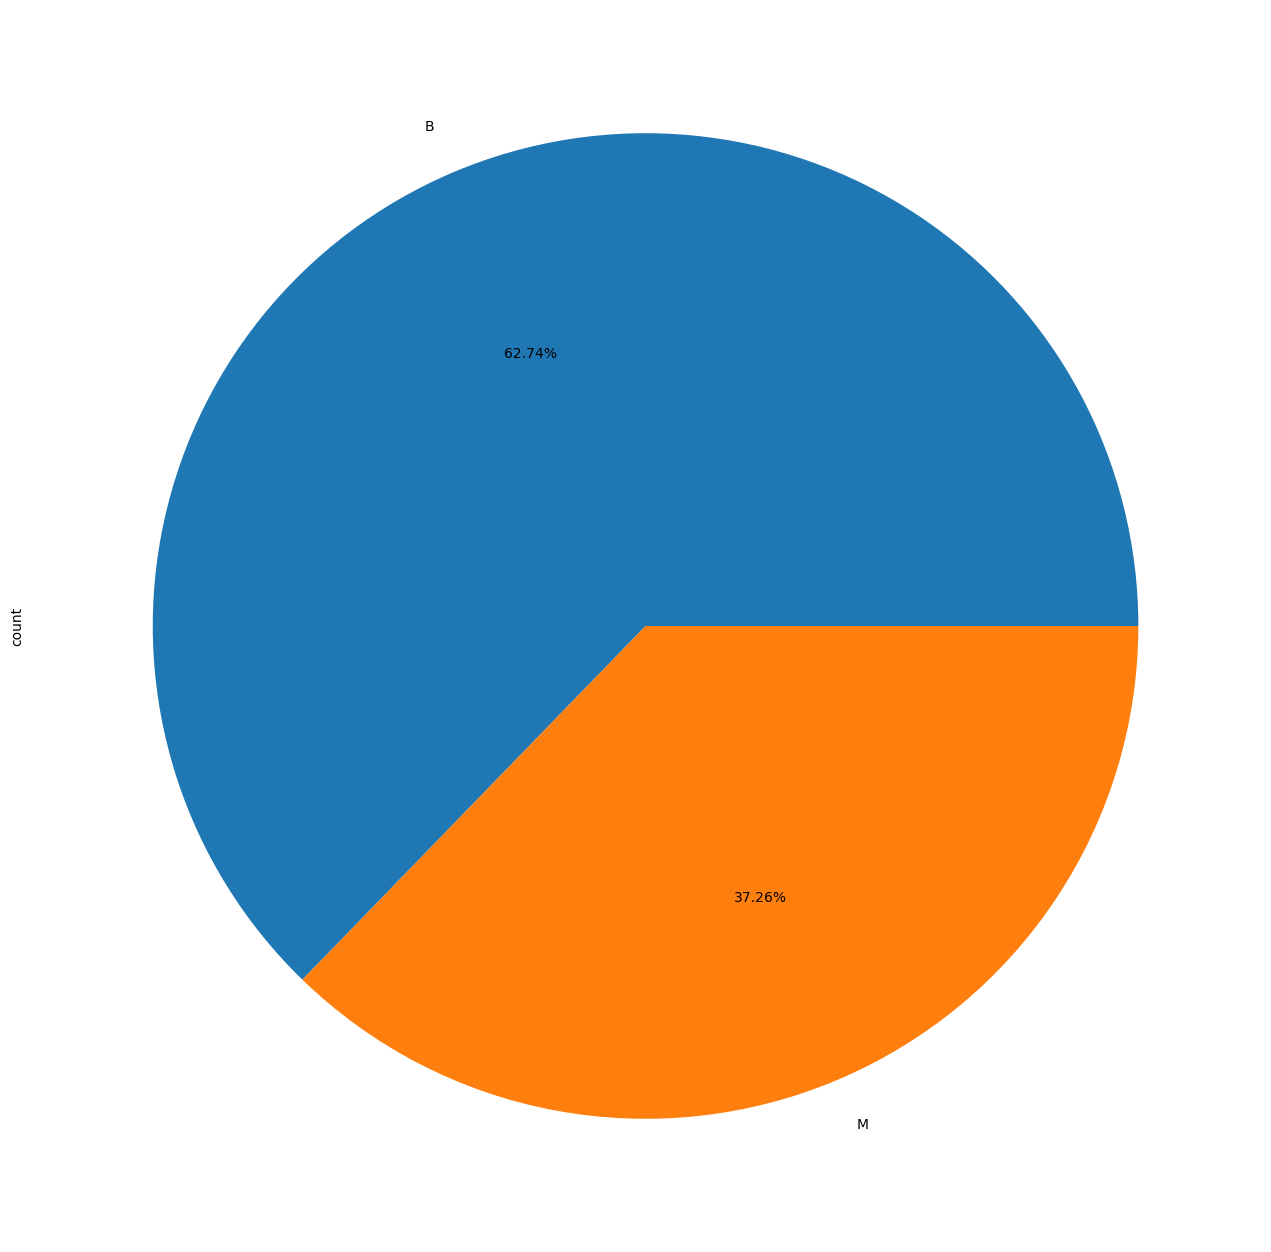

In [255]:
df['diagnosis'].value_counts().plot(kind='pie',autopct='%.2f%%')

# Visualize the relationship between 'diagnosis' and other columns using bar plots

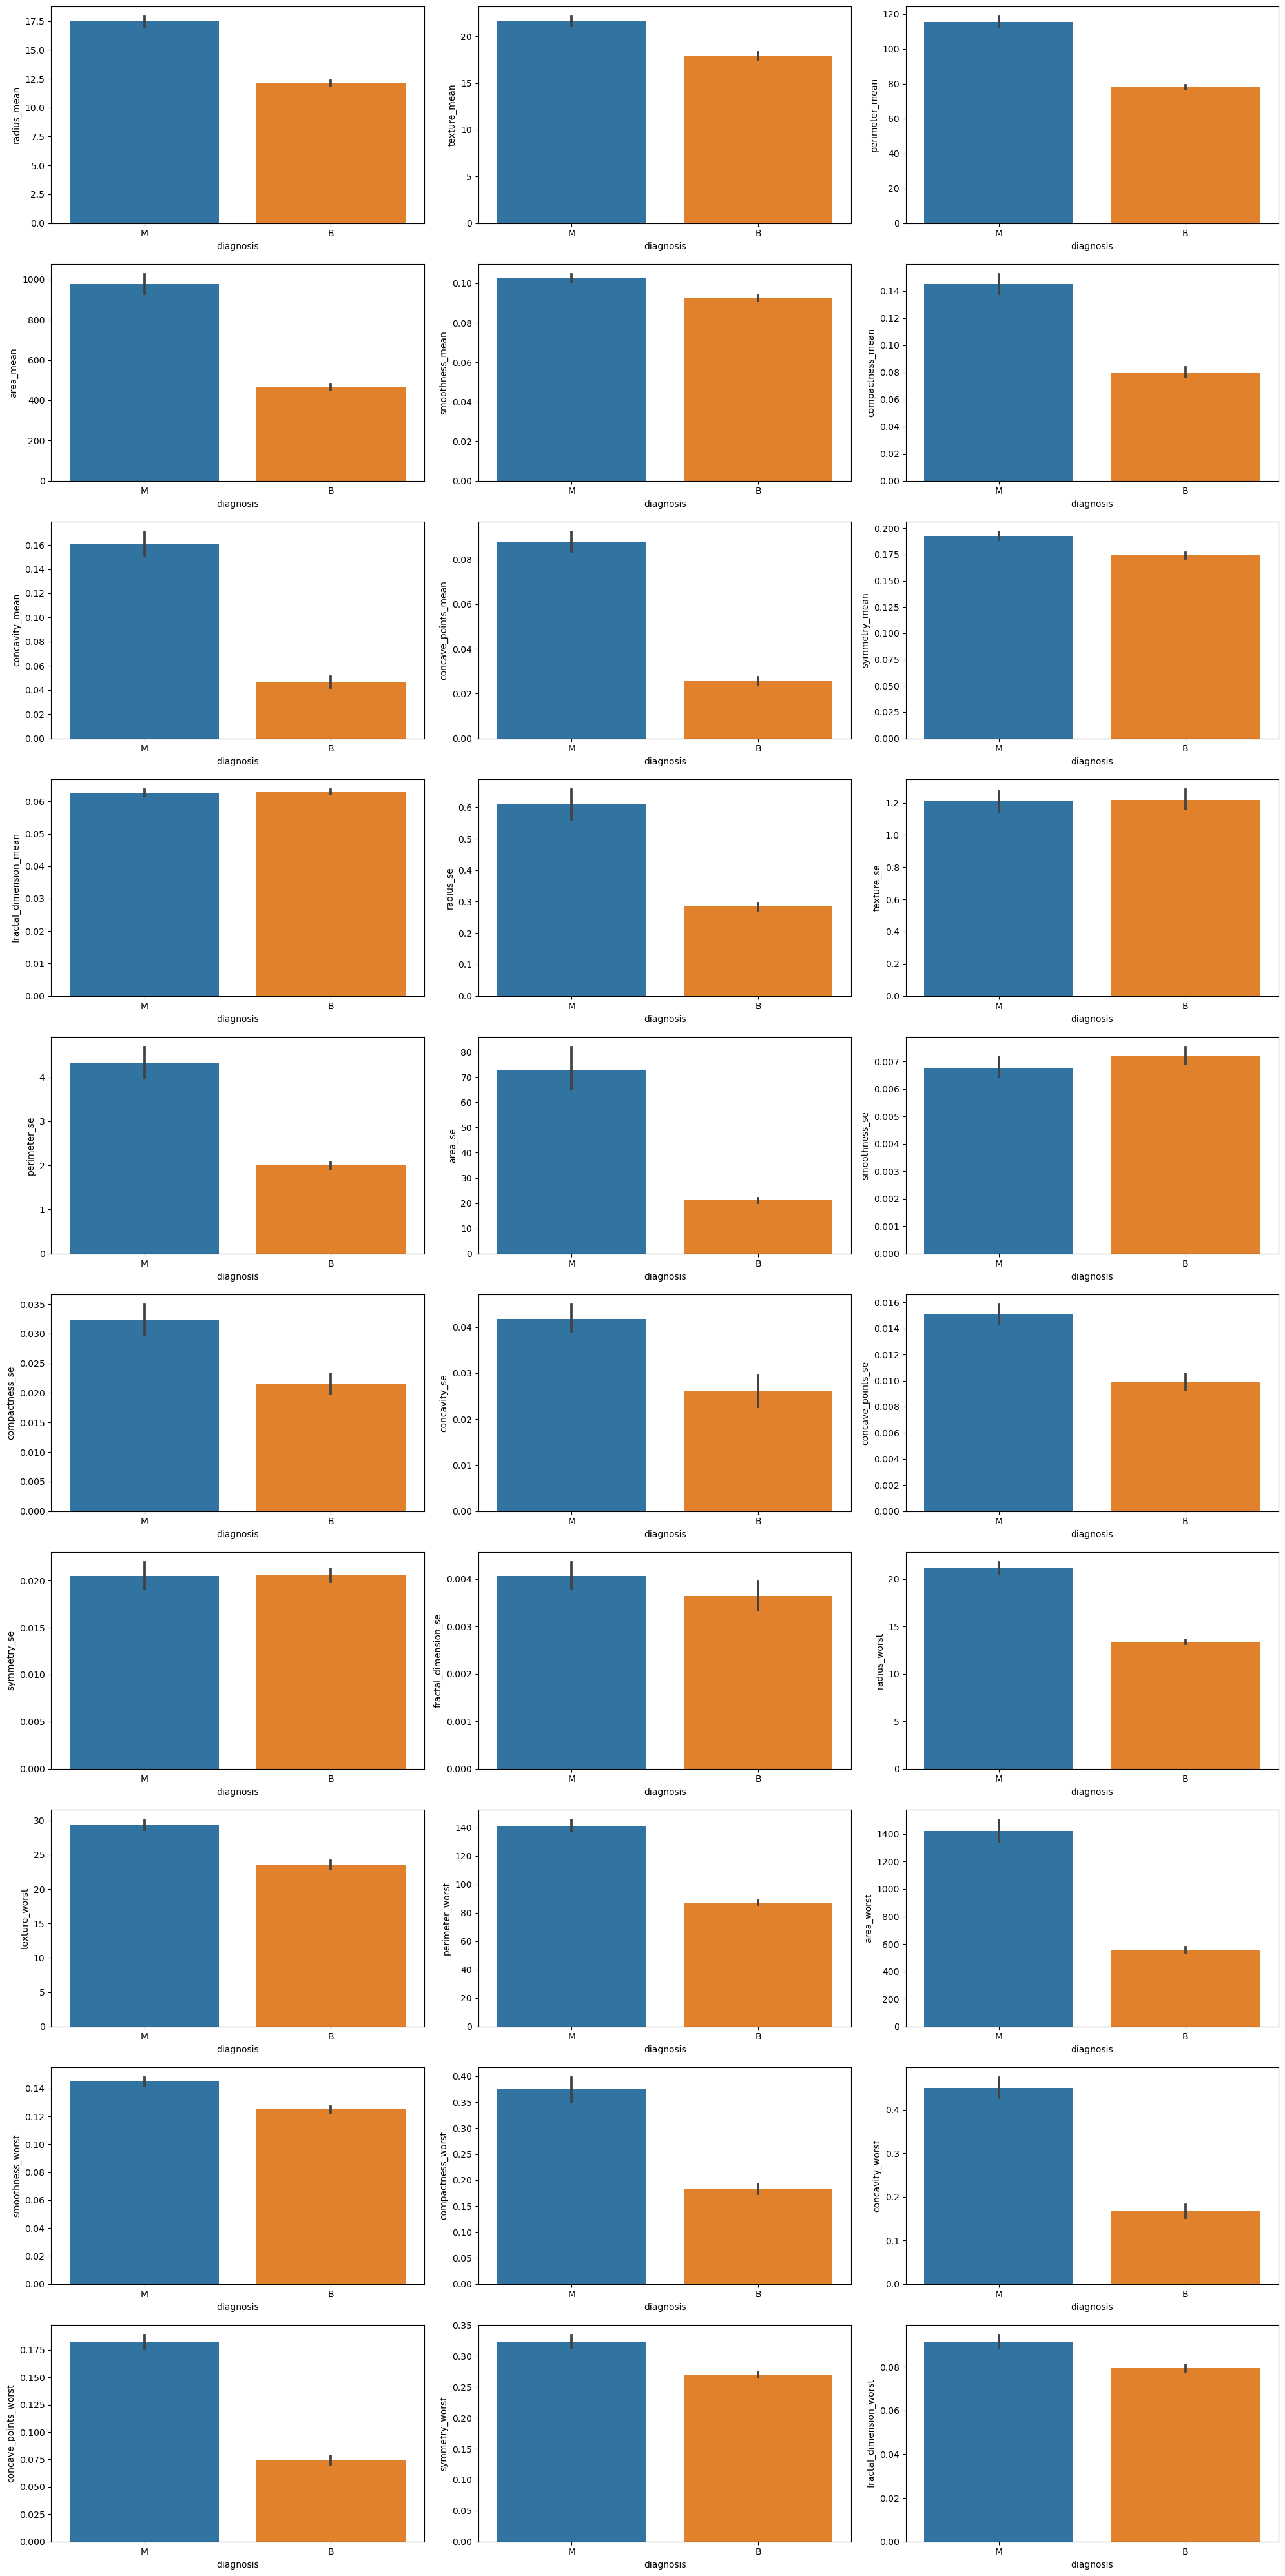

In [256]:
# Creating subplots
fig, ax = plt.subplots(figsize=(20, 40), nrows=10, ncols=3)
ax = ax.flatten()

# Looping through each column
for i, col in enumerate(df.columns[1:]):
    sns.barplot(x='diagnosis', y=col, data=df, ax=ax[i])

# Displaying the plots
plt.tight_layout()
plt.show()

# Visualize the relationship between 'diagnosis' and other columns using box plots

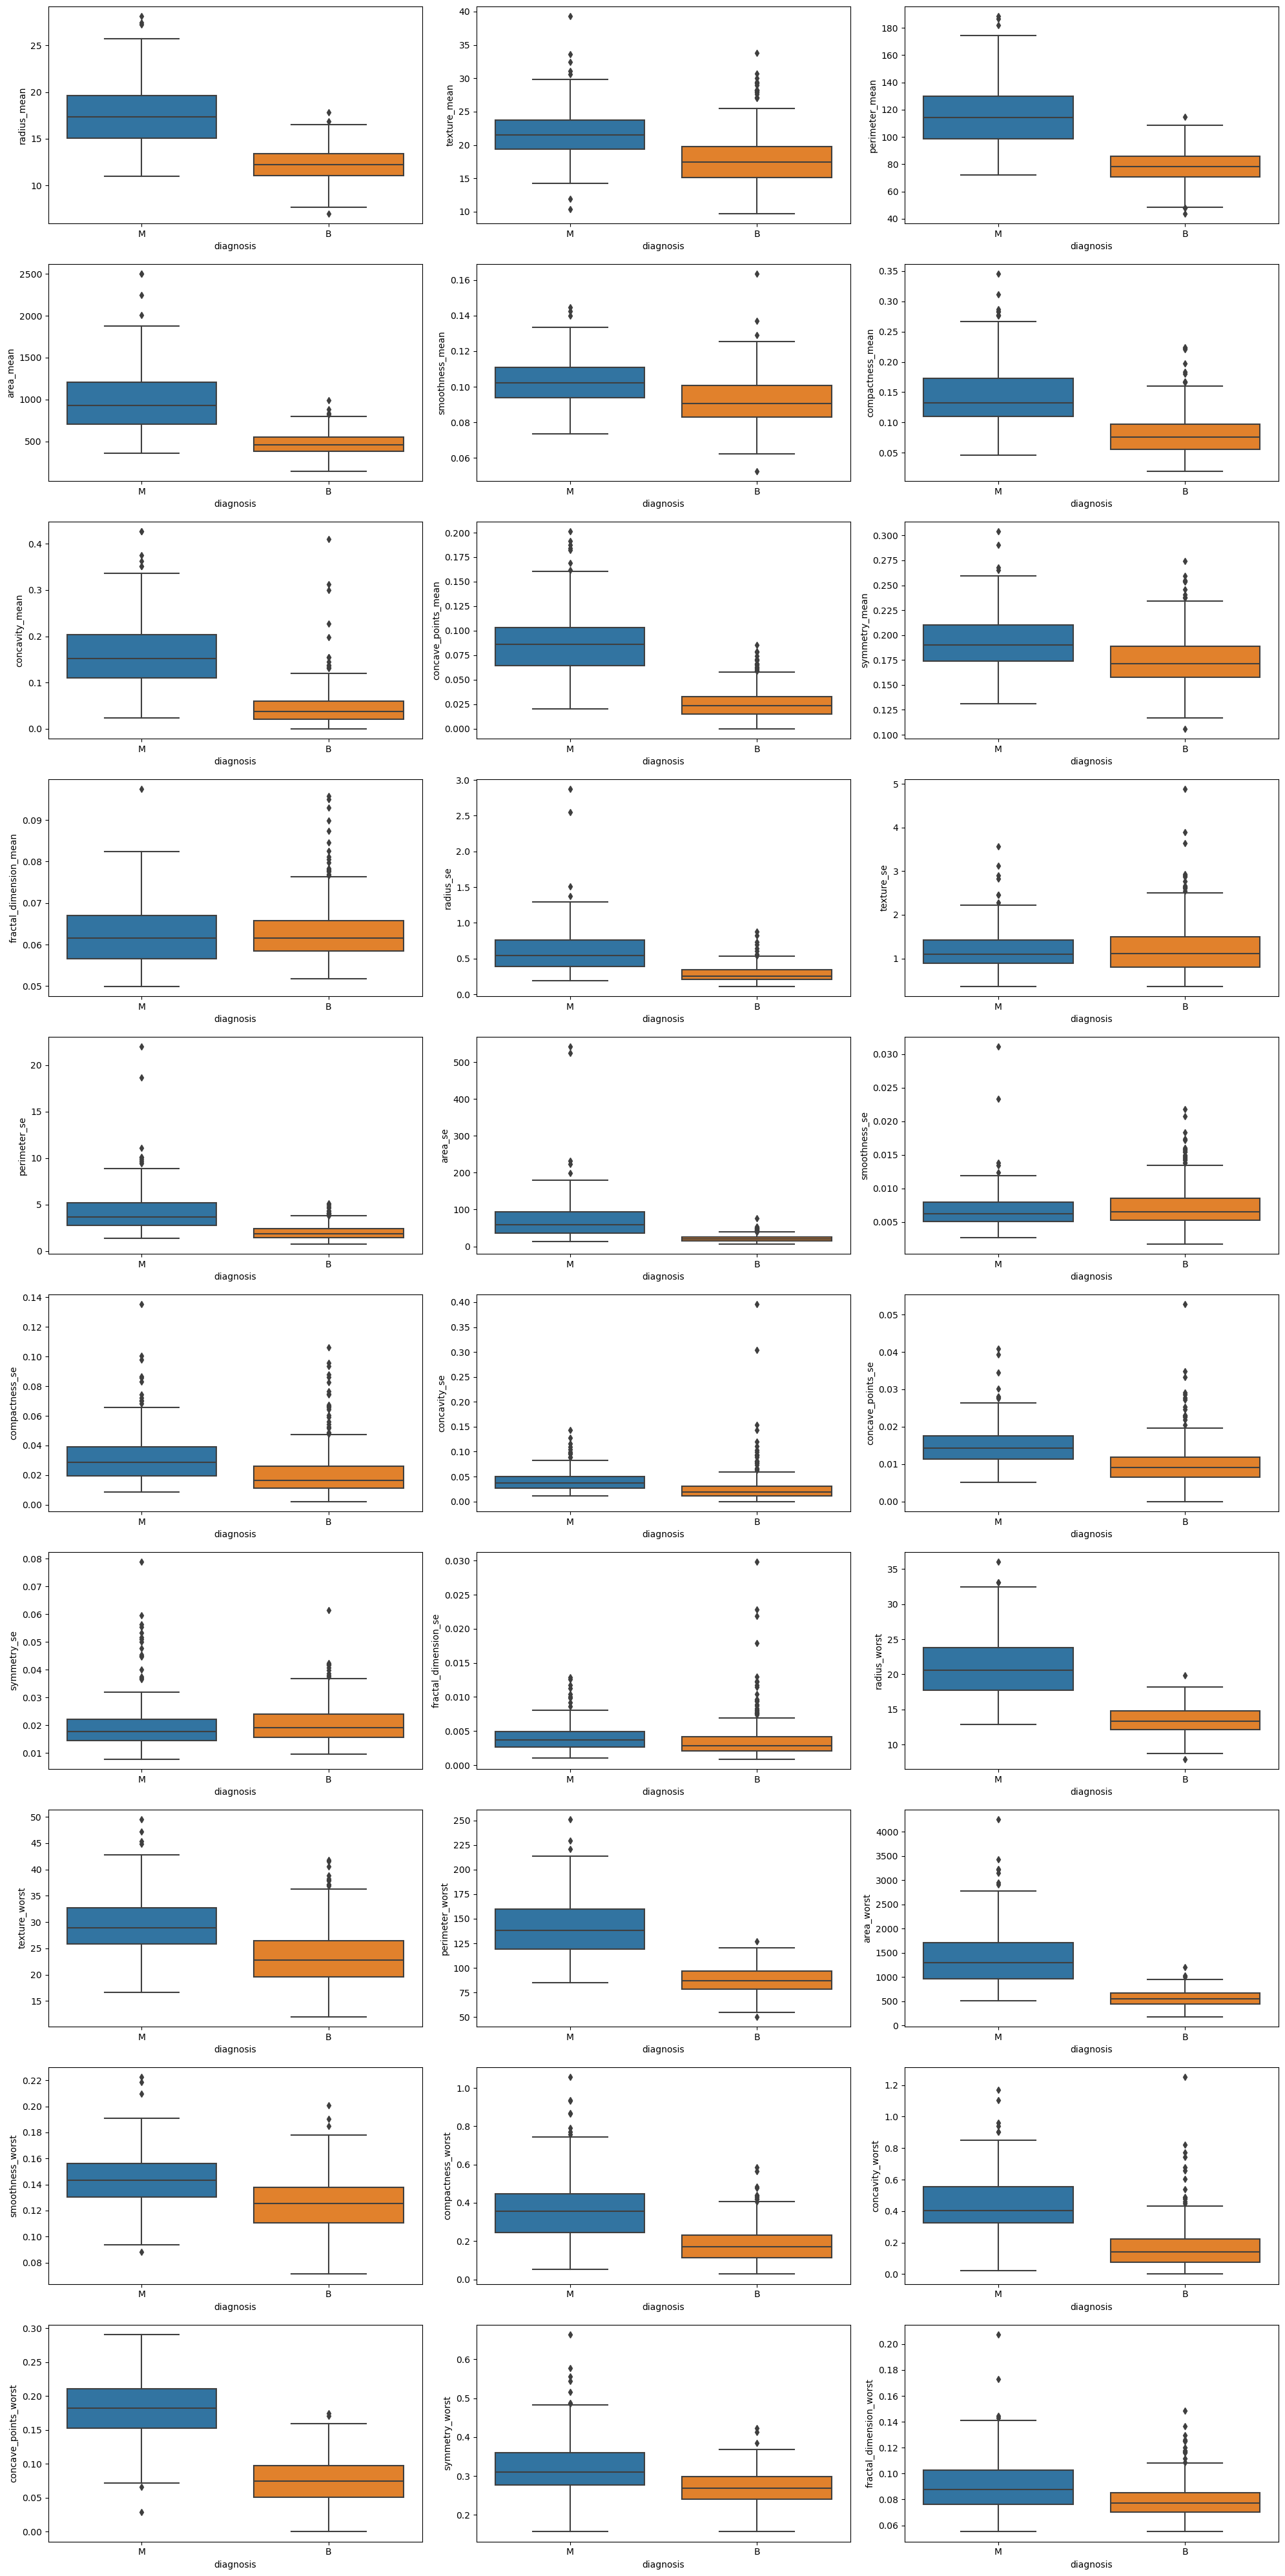

In [257]:
fig, ax = plt.subplots(figsize=(20, 40), nrows=10, ncols=3)
ax = ax.flatten()  # Flatten the axes for easier iteration

# Iterate over each column (excluding the first one, assuming it's the target column)
for i, col in enumerate(df.columns[1:]):
    # Plot a boxplot for each column against the 'diagnosis' column
    sns.boxplot(x='diagnosis', y=col, data=df, ax=ax[i])

# Display the plots
plt.tight_layout()  # Ensure tight layout to avoid overlap
plt.show()

# Visualize the distribution of each column using kernel density estimation plots

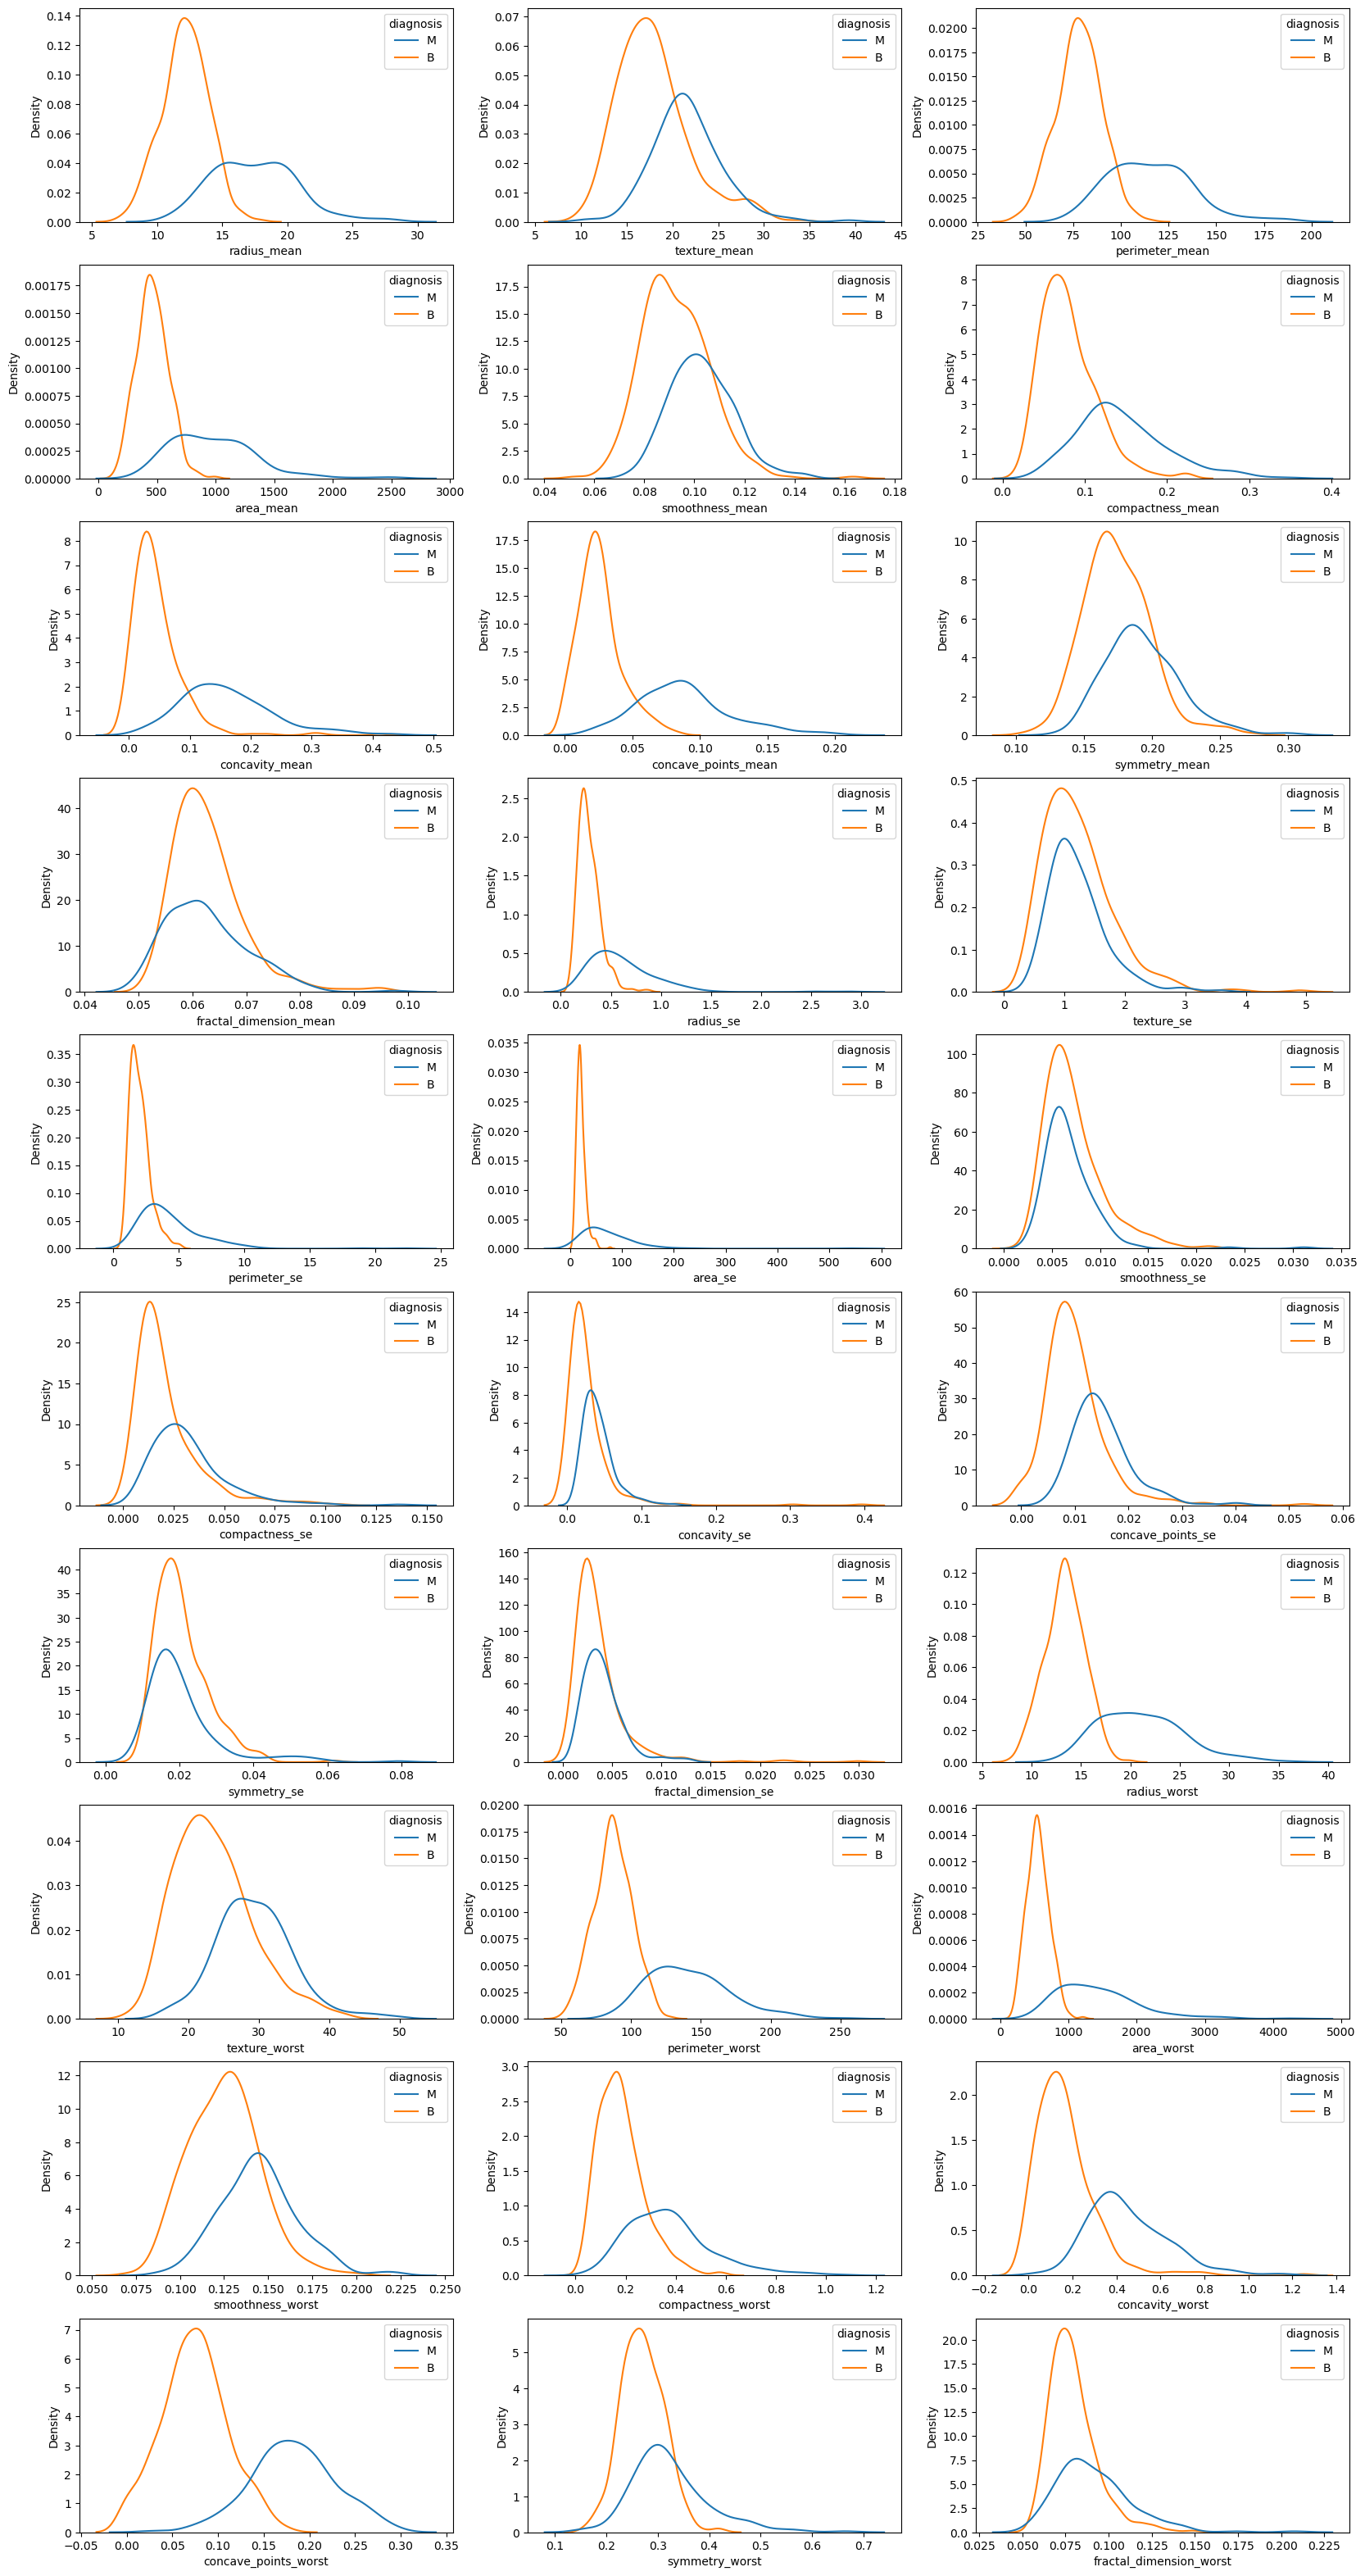

In [258]:
fig,ax=plt.subplots(figsize=(20,40),nrows=10,ncols=3)
ax=ax.flatten()
for i,col in enumerate(df.columns[1:]):
    # df[col]=np.log(df[col])
    sns.kdeplot(x=col,data=df,ax=ax[i],hue='diagnosis');

# Count plot for 'diagnosis'

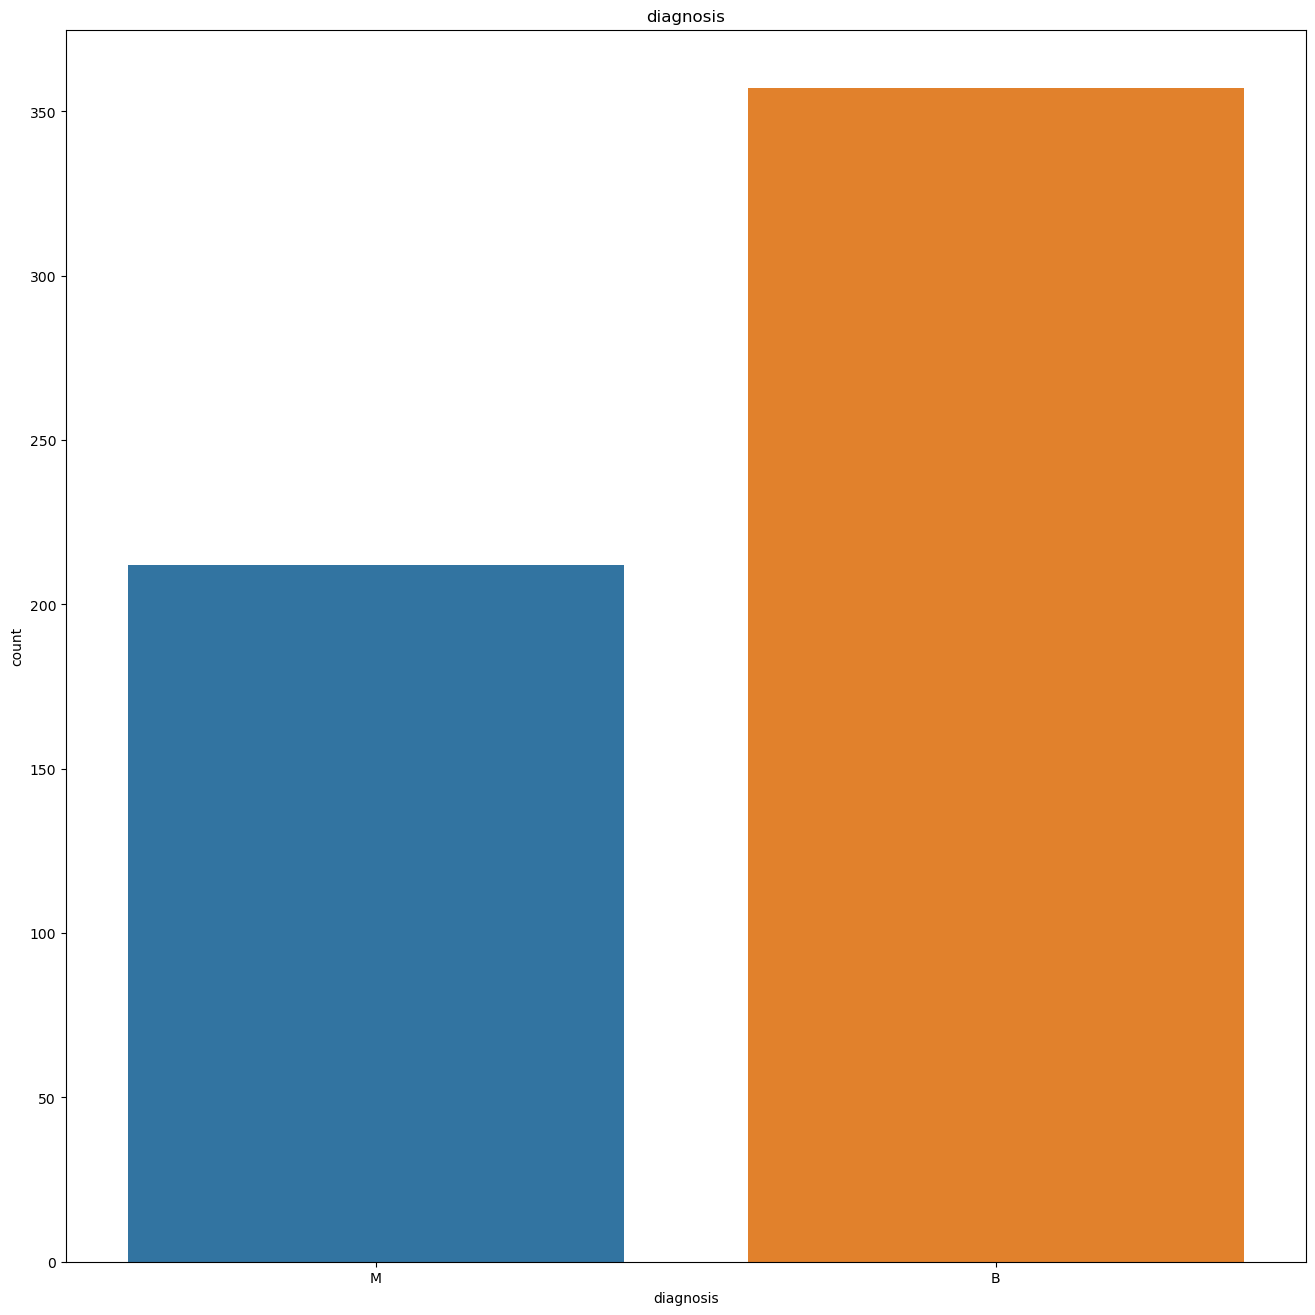

In [259]:
sns.countplot(x=df['diagnosis'])
plt.title('diagnosis');

# Encode the target variable

In [260]:
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# Calculate correlations between features

In [261]:
relations = df.corr()

# Visualize correlations using a heatmap

<Axes: >

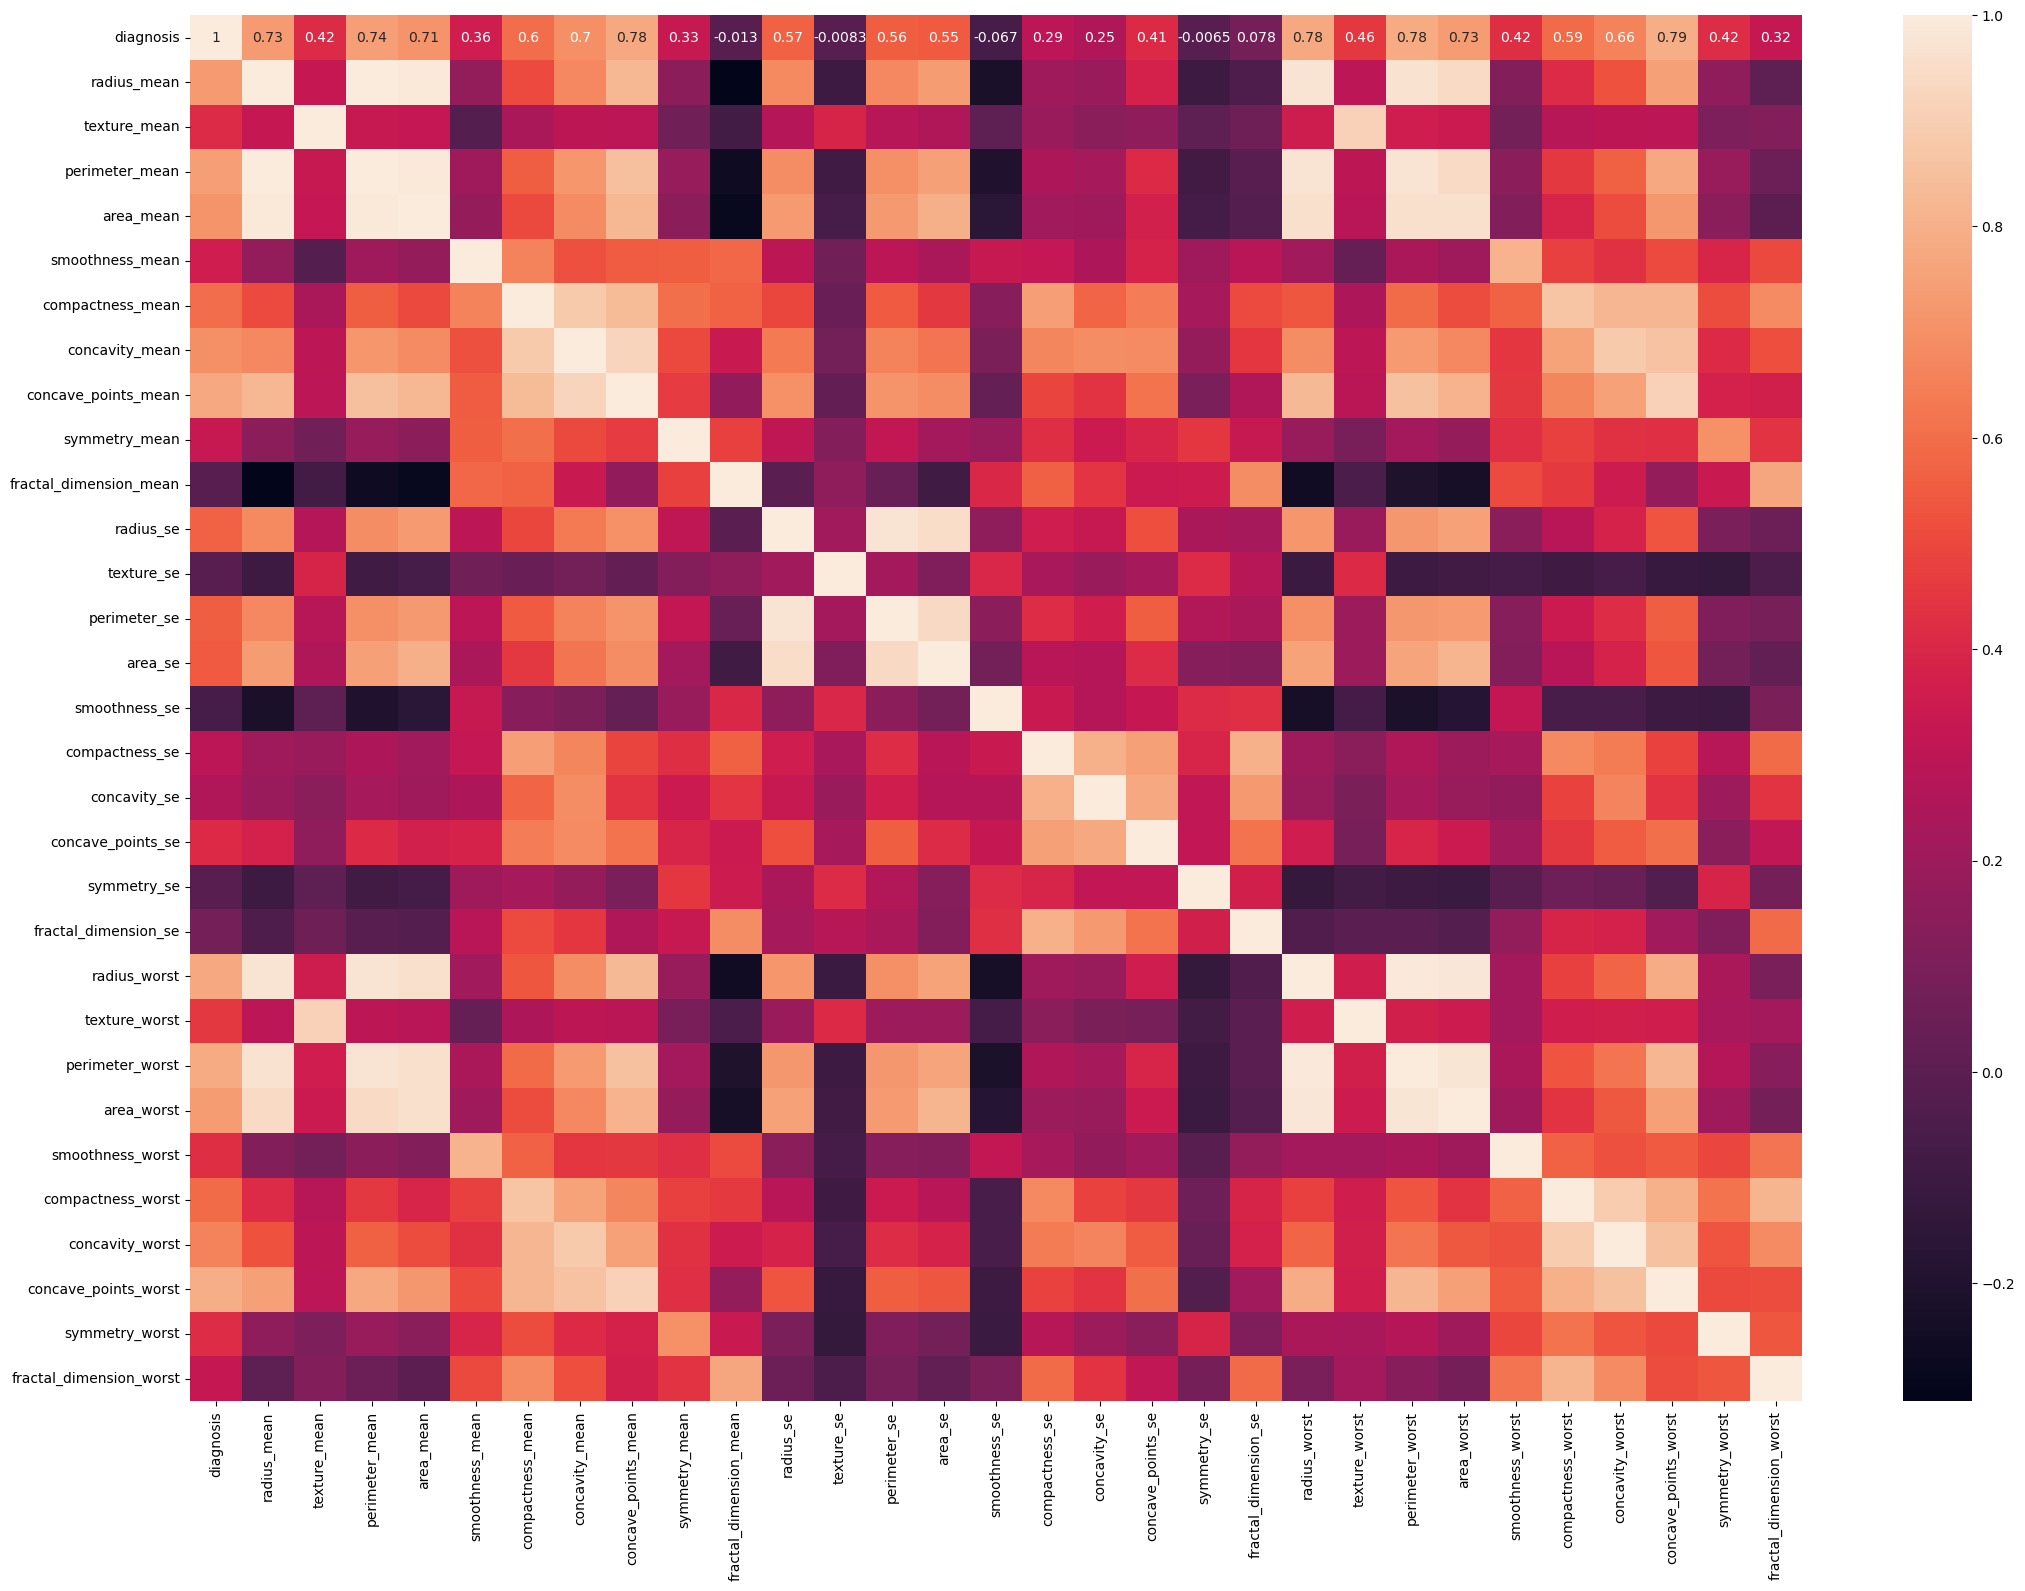

In [262]:
plt.figure(figsize=(26,18))
sns.heatmap(data=relations, annot=True)

# Plot distributions of each column

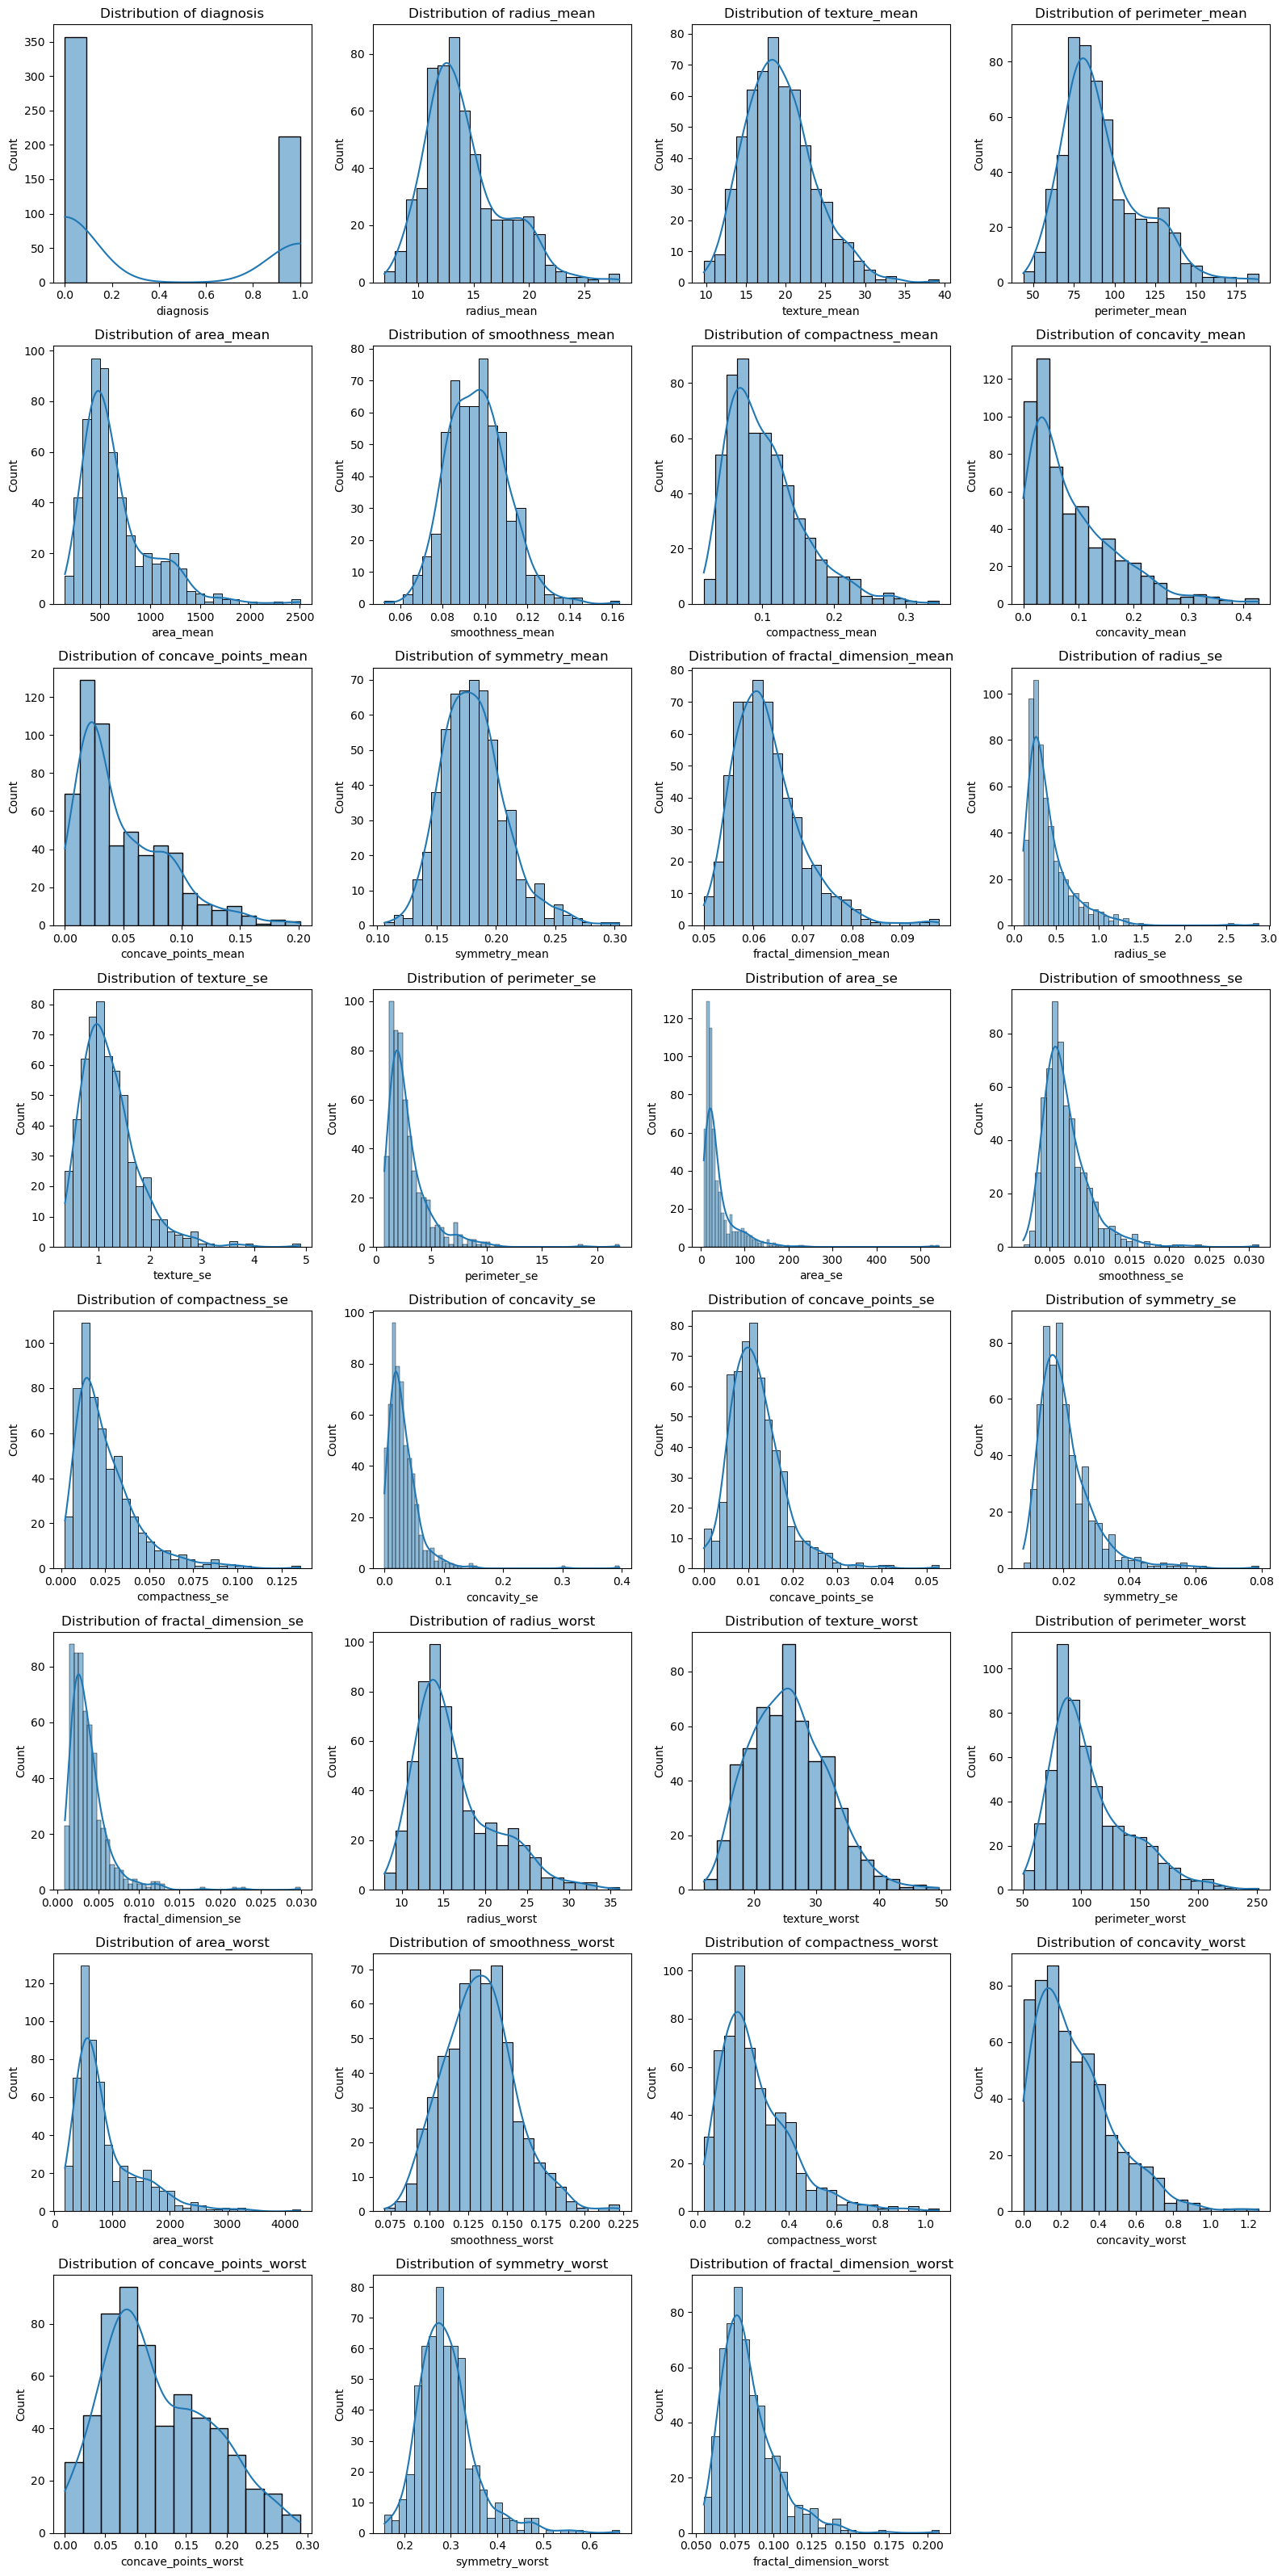

In [263]:
col_values = len(df.columns)
rows = (col_values + 3) // 4
plt.figure(figsize=(16, 4 * rows))  # Adjusting figure size based on the number of rows
for idx, col in enumerate(df.columns):
    plt.subplot(rows, 4, idx + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()  # Ensures tight layout to avoid overlap
plt.show()

# Box plots for each column

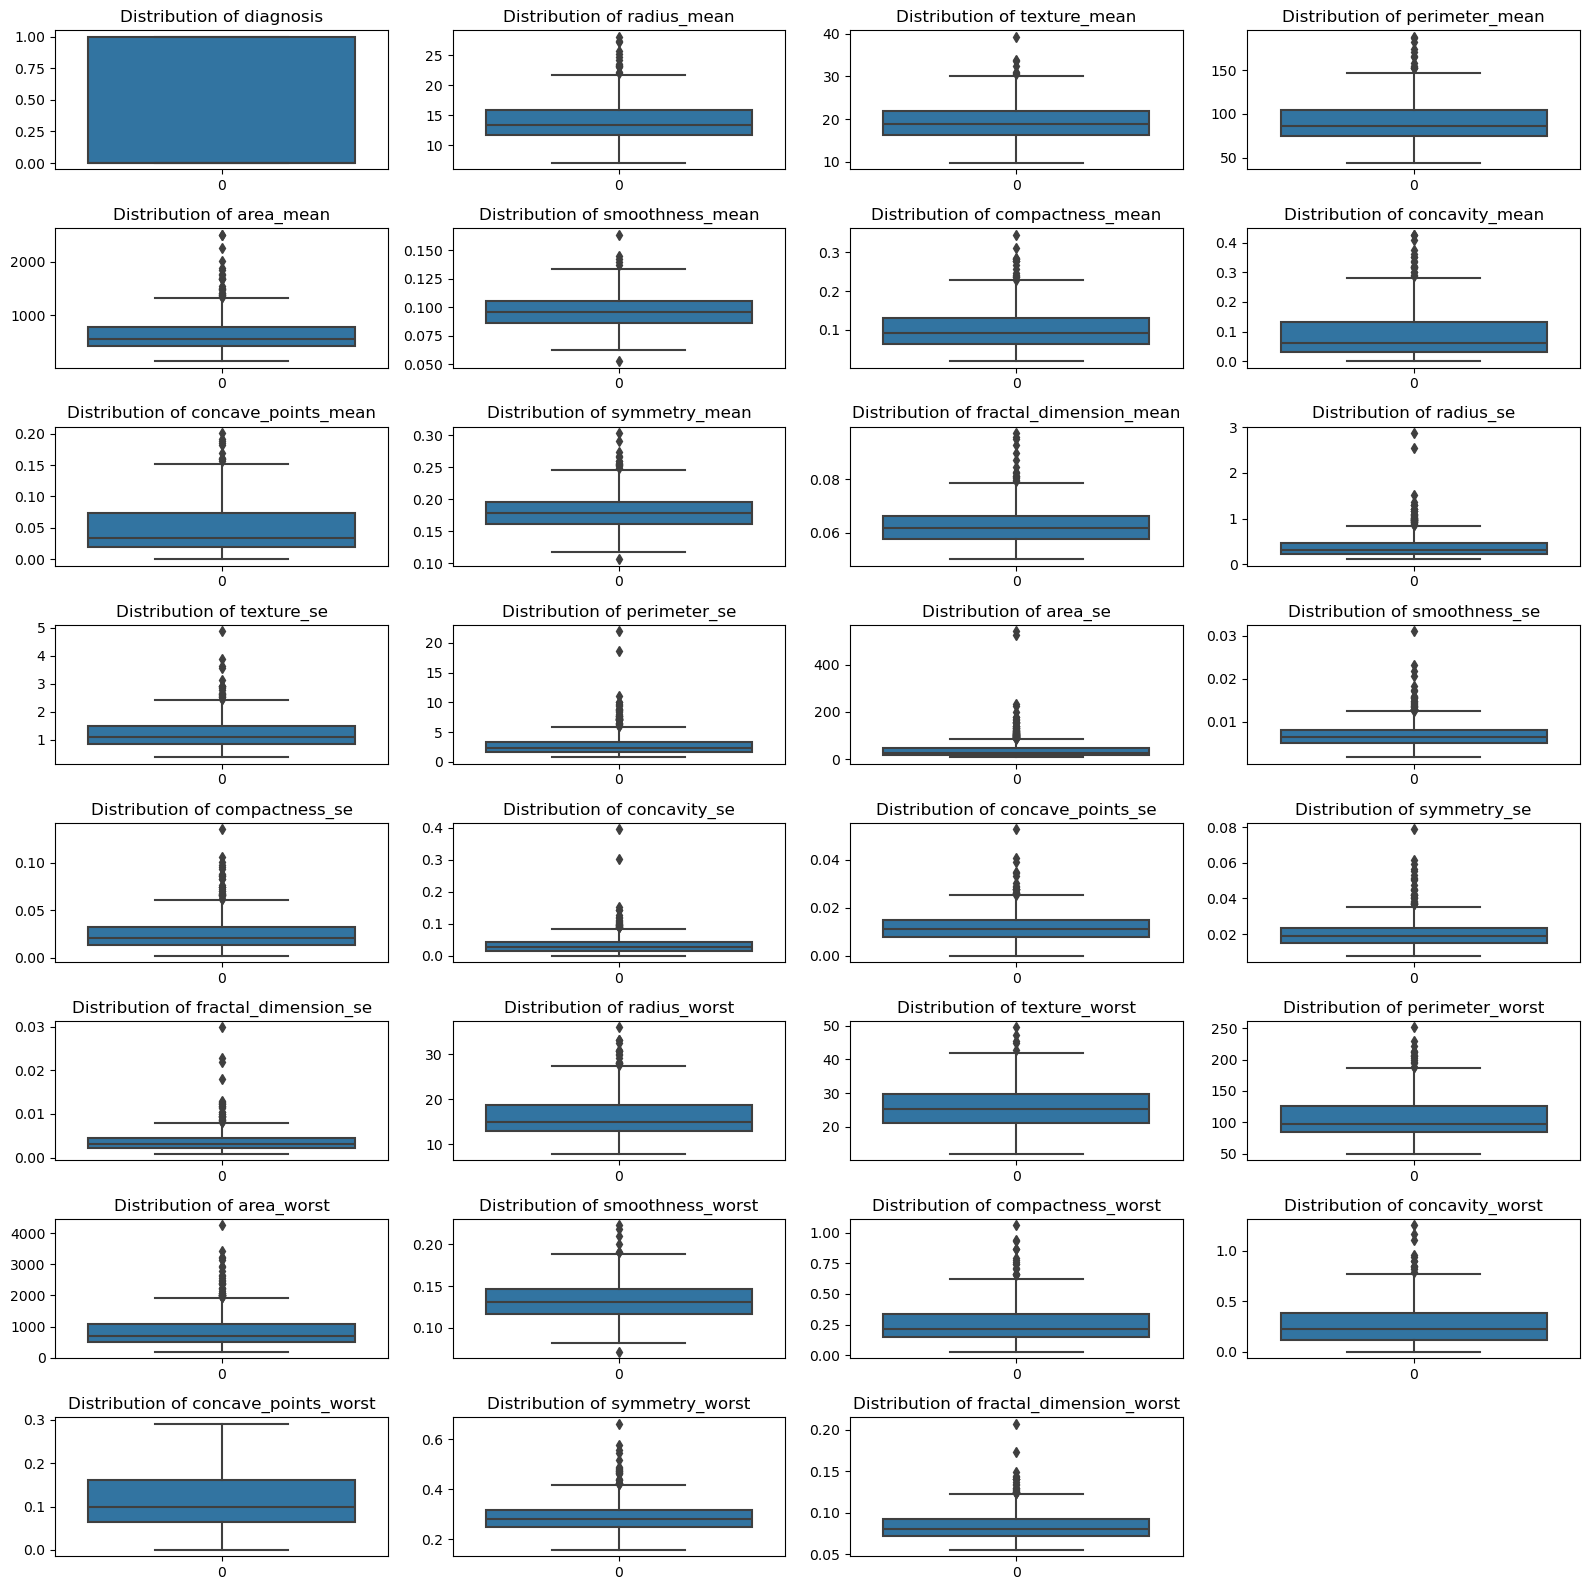

In [264]:
col_values = len(df.columns)
rows = (col_values+3)//4
plt.figure(figsize=(16,16))
for idx, col in enumerate(df.columns):
  plt.subplot(rows, 4, idx+1)
  sns.boxplot(df[col])
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.plot()

# Kernel density estimation plots

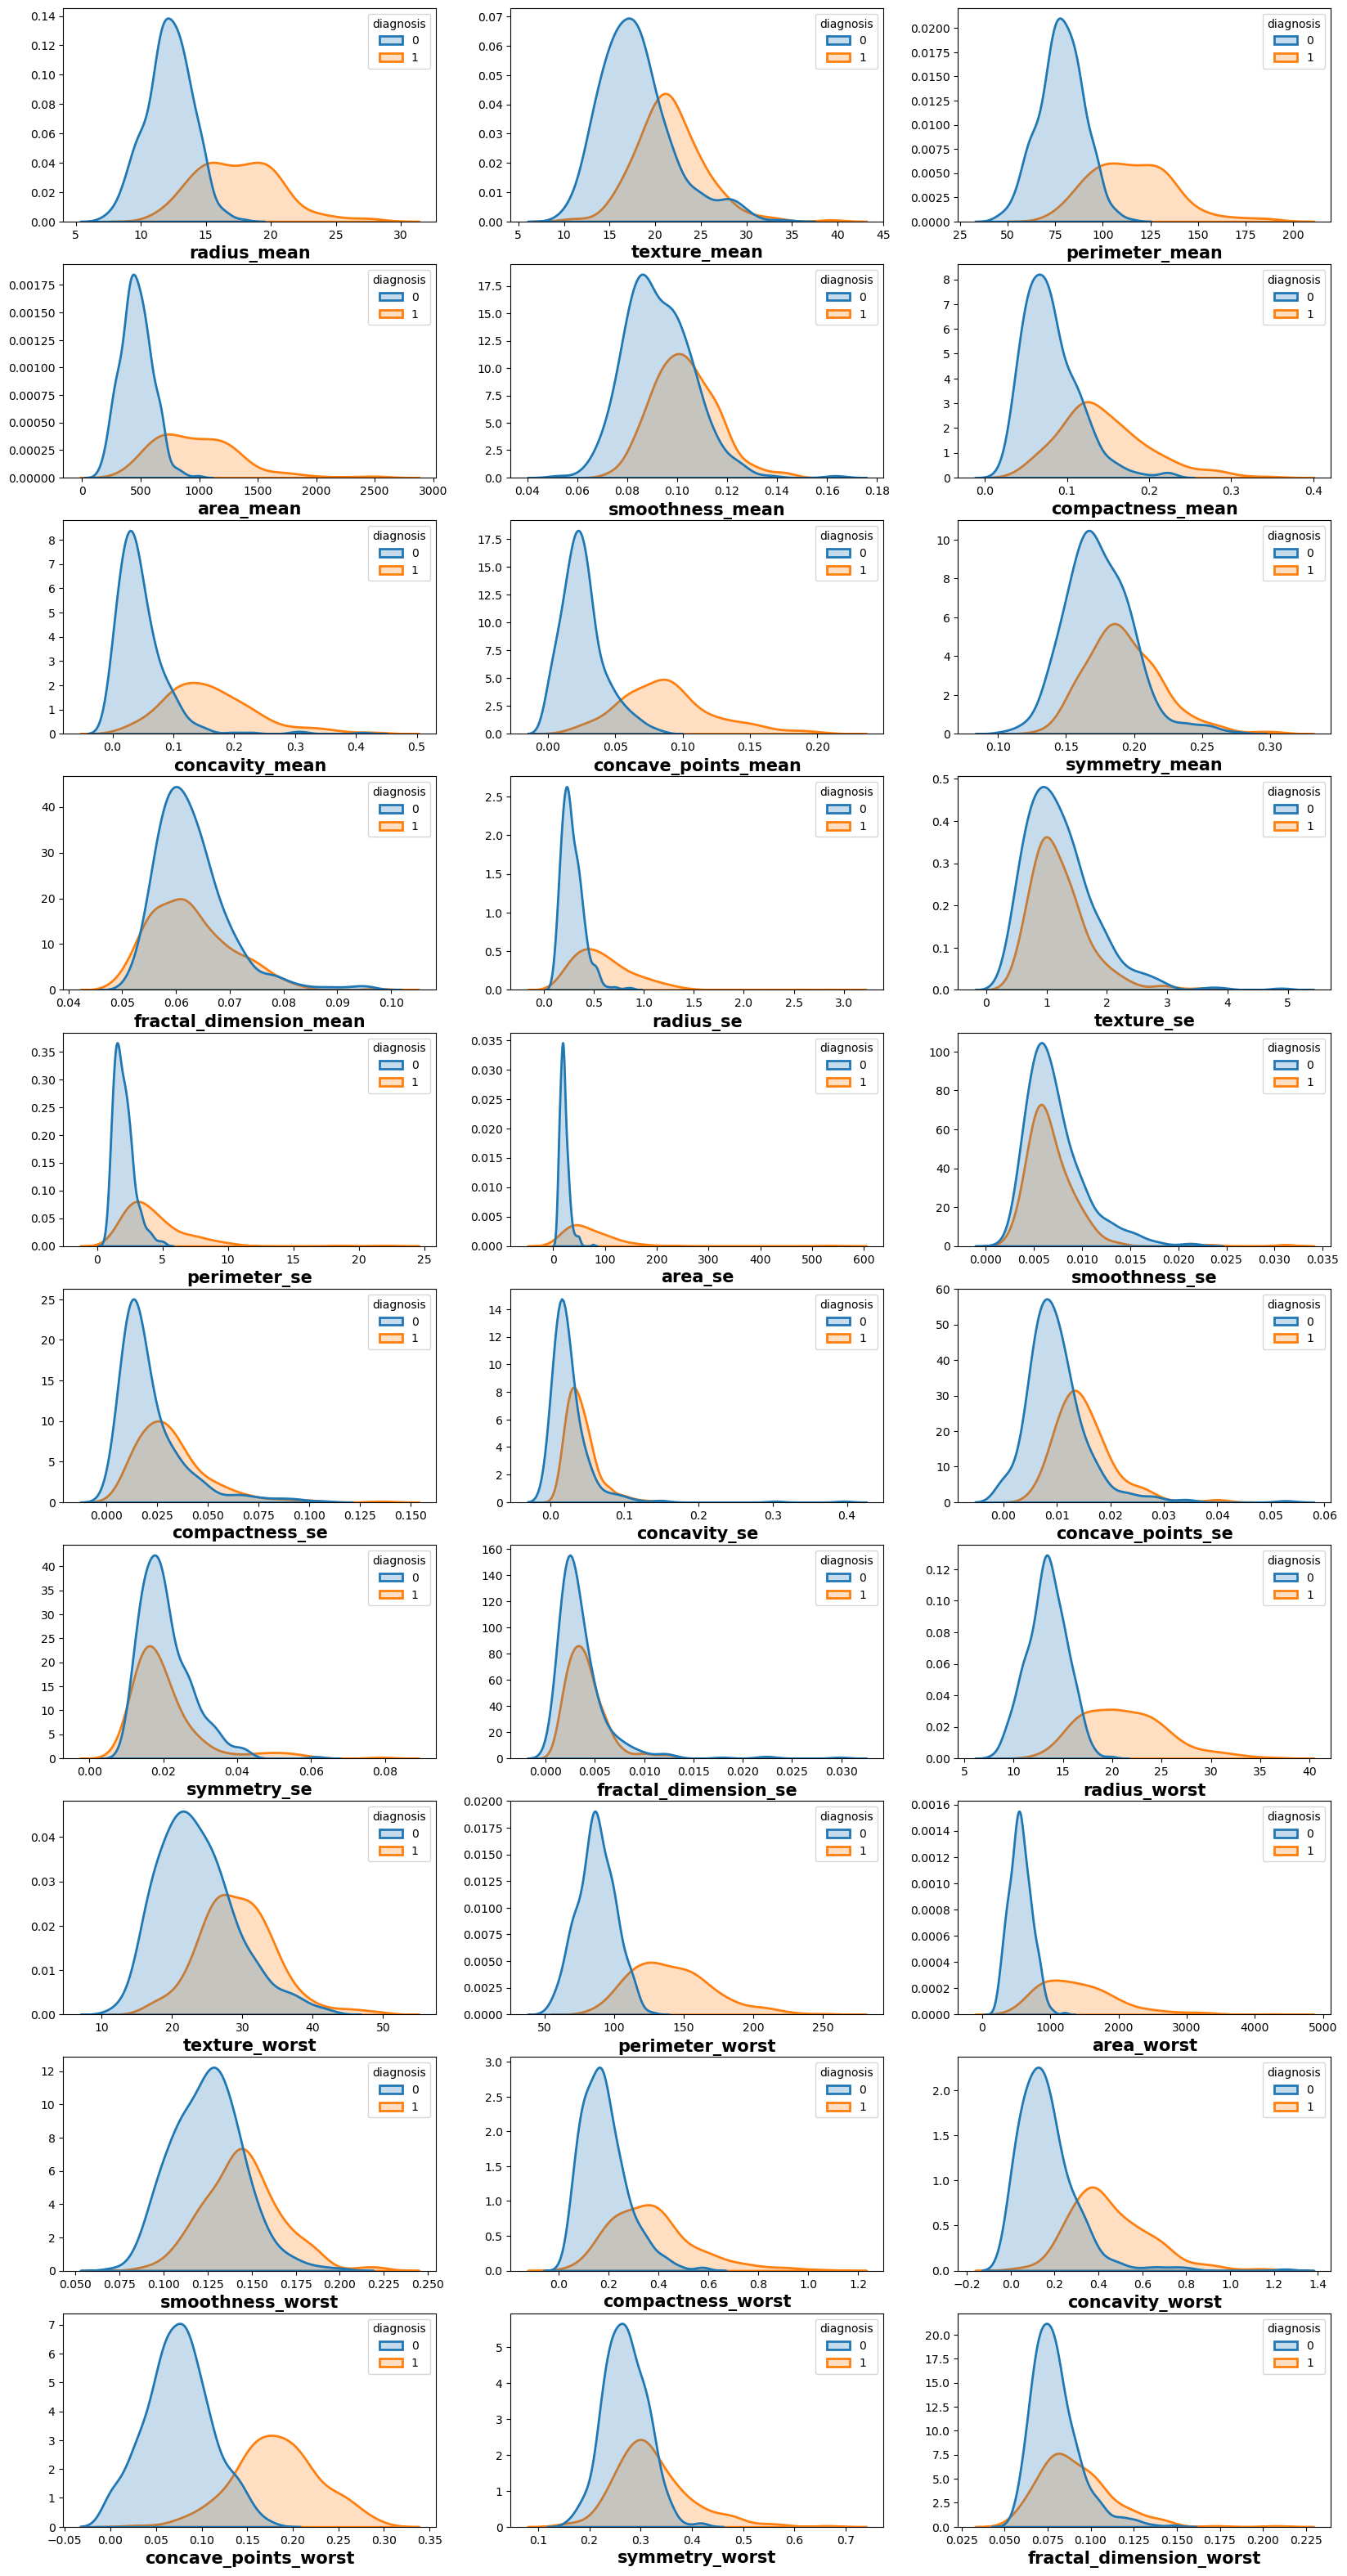

In [265]:
fig, ax = plt.subplots(10, 3, figsize=(20, 40))
ax = ax.flatten()

for i, col in enumerate(df.columns[1:]):
    sns.kdeplot(x=col, data=df, ax=ax[i], fill=True, lw = 2, hue = 'diagnosis')
    ax[i].set_xlabel(col, fontsize = 15, fontweight = 'bold')
    ax[i].set_ylabel('')

# Scatter plot for 'radius_mean' and 'perimeter_mean'

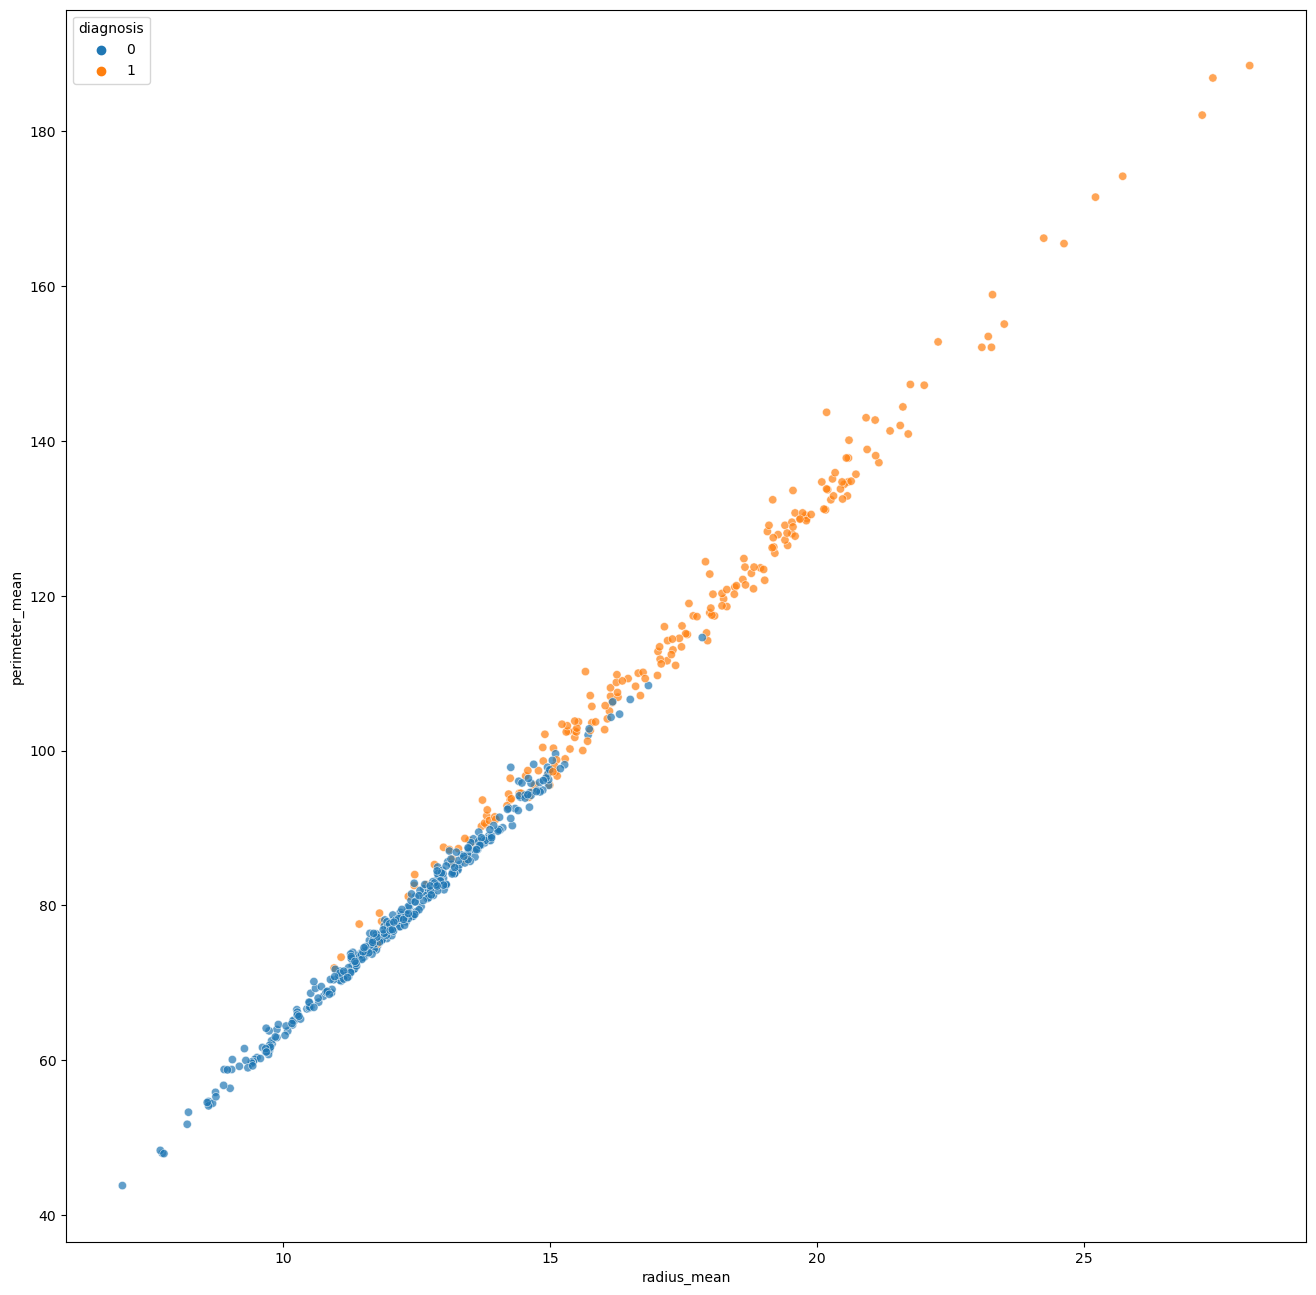

In [266]:
sns.scatterplot(x='radius_mean', y='perimeter_mean', data=df, hue='diagnosis', alpha=0.7);

# Split the data into train and test sets

In [267]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [268]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Standardize the features

In [269]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Support Vector Machine model

In [270]:
model=SVC(random_state=42)

In [271]:
model.fit(X_train,y_train)

SVC(random_state=42)

# Make predictions on the test set

In [272]:
y_pred = model.predict(X_test)

# Evaluate the model

In [273]:
accuracy = accuracy_score(y_test, y_pred)

In [274]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99        71\n           1       1.00      0.95      0.98        43\n\n    accuracy                           0.98       114\n   macro avg       0.99      0.98      0.98       114\nweighted avg       0.98      0.98      0.98       114\n'

In [275]:
confusion_matrix(y_test,y_pred)

array([[71,  0],
       [ 2, 41]], dtype=int64)

# Visualize the confusion matrix using a heatmap

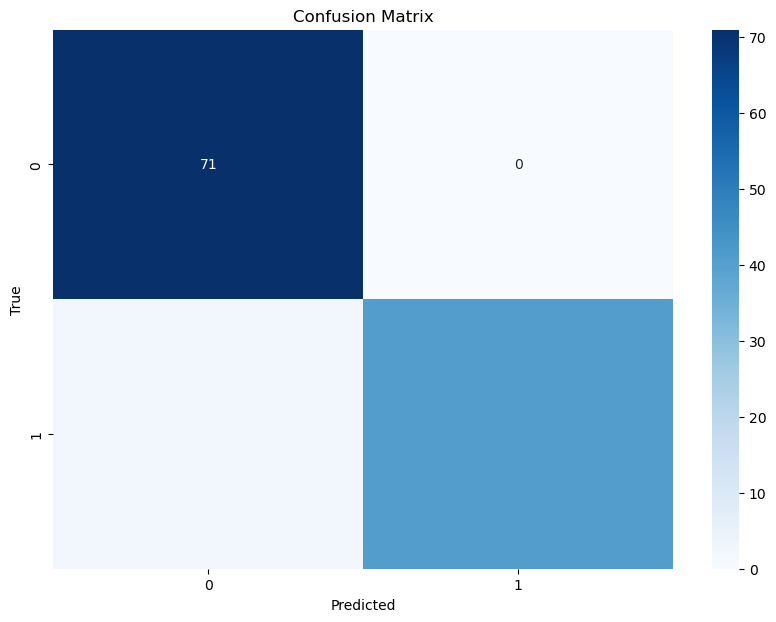

In [276]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')  # Using the 'Blues' colormap and displaying counts as integers
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Data Exploration: The code starts with data exploration, including loading the dataset (data.csv), checking basic information (info()), summary statistics (describe()), handling missing values (isna().sum()), checking for duplicates (duplicated().sum()), and visualizing class distribution using a pie chart and count plot.

Data Visualization: Various plots such as barplots, boxplots, and kernel density estimation (KDE) plots are used to explore the relationships between the features and the target variable (diagnosis). Additionally, correlation between features is visualized using a heatmap.

Feature Distribution: Histograms and boxplots are plotted to visualize the distribution of each feature in the dataset. KDE plots are also used to visualize the distribution of features based on the target variable (diagnosis).

Model Building: The dataset is split into training and testing sets using train_test_split(). Features are standardized using StandardScaler. Then, a Support Vector Machine (SVM) model is trained on the standardized training data using SVC().

Model Evaluation: The trained SVM model is used to make predictions on the test data, and the accuracy of the model is calculated using accuracy_score(). Additionally, a classification report (classification_report()) and a confusion matrix (confusion_matrix()) are generated to evaluate the performance of the model.

Confusion Matrix Visualization: The confusion matrix is visualized using a heatmap, providing insights into the performance of the SVM model in terms of true positive, true negative, false positive, and false negative predictions.

Overall, the code demonstrates a comprehensive workflow for data exploration, visualization, model building, and evaluation in a binary classification task (predicting breast cancer diagnosis).